import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image 
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

load data

In [3]:
data = [] #danh sach luu du lieu anh
labels = [] #danh sach luu tru nhan cua anh
classes = 43 # so lop
cur_path = os.getcwd() # lay dia chi 

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Chuyen cac lists thanh cac numpy array de lam dau vao cho model
data = np.array(data)
labels = np.array(labels)

In [4]:
print("DATA SHAPE: ", data.shape)
print("LABELS SHAPE: ", labels.shape)
# Kích thước của dữ liệu là  (39209, 30, 30, 3), có nghĩa là có 39209 hình ảnh, mỗi ảnh có kích thước 
# 30x30 pixel, số 3 ở cuối thể hiện dữ liệu là hình ảnh màu (giá trị RGB).

DATA SHAPE:  (39209, 30, 30, 3)
LABELS SHAPE:  (39209,)


split the data

In [5]:
#  phan chia bo du lieu thanh train set va test set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (31367, 30, 30, 3)
Shape of X_test:  (7842, 30, 30, 3)
Shape of y_train:  (31367,)
Shape of y_test:  (7842,)


In [9]:
for i in range(5):
    print(f"label {i} (y_train): {y_train[i]} \n")
print("-----------------------\n")
for i in range(5):
    print(f"label {i} (y_test): {y_test[i]} \n")

label 0 (y_train): 36 

label 1 (y_train): 28 

label 2 (y_train): 2 

label 3 (y_train): 5 

label 4 (y_train): 26 

-----------------------

label 0 (y_test): 26 

label 1 (y_test): 15 

label 2 (y_test): 13 

label 3 (y_test): 10 

label 4 (y_test): 15 



Use "to_categorical" method to convert the labels present in y_train and y_test into one-hot encoding

In [10]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [11]:
for i in range(5):
    print(f"label {i} (y_train) after one-hot encoding: {y_train[i]} \n")
print("-----------------------\n")
for i in range(5):
    print(f"label {i} (y_test) after one-hot encoding: {y_test[i]} \n")

label 0 (y_train) after one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 

label 1 (y_train) after one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

label 2 (y_train) after one-hot encoding: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

label 3 (y_train) after one-hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

label 4 (y_train) after one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

-----------------------

label 0 (y_test) after one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

Xây dựng mô hình CNN

Kiến trúc mô hình CNN gòm:
- 2 Conv2D layer có filter= 32, kích thước kernel = (5,5), hàm kích hoạt = relu
- MaxPool2D layer có pool_size = (2,2)
- 2 Conv2D layer (filter=64, kernel_size=(3,3), activation=”relu”)
- MaxPool2D layer ( pool_size=(2,2))
- Dropout layer (rate=0.25)
- Flatten layer to squeeze the layers into 1 dimension
- Dense Fully connected layer (256 nodes, activation=”relu”)
- Dropout layer (rate=0.5)
- Dense layer (43 nodes, activation=”softmax”) trong do 43 nodes là số lượng lớp, dùng hàm softmax để xác định output thuộc lớp nào

In [14]:
input_shape = X_train.shape[1:]

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=input_shape))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 64)          36928     
                                                      

Compilation of the model (tong hop mo hinh)
- Optimizer (tối ưu): nhằm tối ưu các trọng số đầu vào bằng cách so sánh dự đoán và hàm mất mát
- Metrics : được sử dụng để đánh giá hiệu suất của mô hình

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train và xác thực mô hình

Sau khi xây dựng kiến ​​trúc mô hình, chúng ta sẽ huấn luyện mô hình bằng cách sử dụng model.fit (). Chúng ta hãy thử với batch size là 32 và 64. nhận thấy mô hình hoạt động tốt hơn với batch size là 64. và sau 15 epochs độ chính xác đã được ổn định.

In [17]:
epochs = 15
batch_size = 64
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
491/491 [==============================] - 102s 202ms/step - loss: 2.1795 - accuracy: 0.4581 - val_loss: 0.5836 - val_accuracy: 0.8651
Epoch 2/15
491/491 [==============================] - 89s 182ms/step - loss: 0.7760 - accuracy: 0.7773 - val_loss: 0.2677 - val_accuracy: 0.9396
Epoch 3/15
491/491 [==============================] - 89s 182ms/step - loss: 0.5355 - accuracy: 0.8399 - val_loss: 0.1962 - val_accuracy: 0.9499
Epoch 4/15
491/491 [==============================] - 91s 184ms/step - loss: 0.3835 - accuracy: 0.8839 - val_loss: 0.1116 - val_accuracy: 0.9718
Epoch 5/15
491/491 [==============================] - 91s 185ms/step - loss: 0.3307 - accuracy: 0.9022 - val_loss: 0.0919 - val_accuracy: 0.9709
Epoch 6/15
491/491 [==============================] - 91s 185ms/step - loss: 0.2809 - accuracy: 0.9159 - val_loss: 0.0698 - val_accuracy: 0.9828
Epoch 7/15
491/491 [==============================] - 92s 187ms/step - loss: 0.2362 - accuracy: 0.9319 - val_loss: 0.0772 - val_a

 Sử dụng matplotlib để vẽ biểu đồ tương quan giữa độ chính xác và sự mất mát.

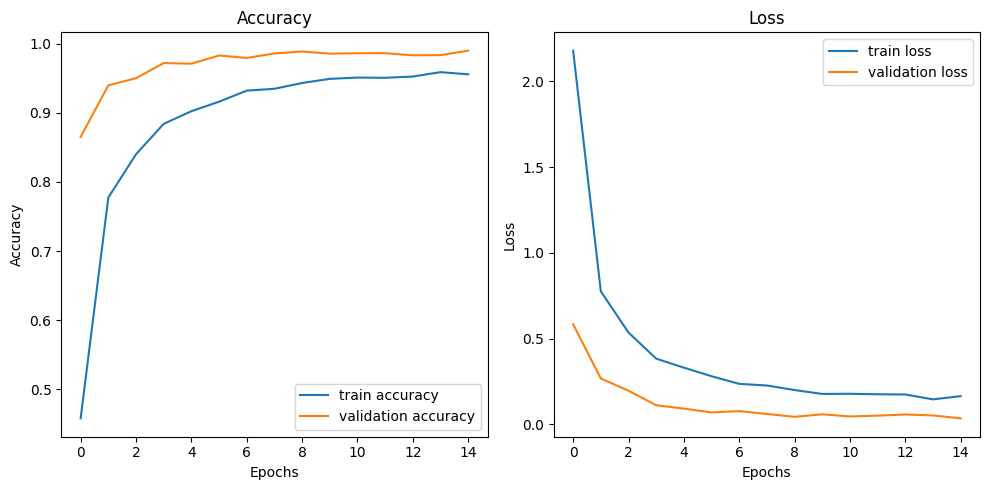

In [18]:
# Figure size
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
# Plot train and validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
# Plot loss and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
# Lưu mô hình đã train
model.save("my_model.h5")

Kiểm tra mô hình với test set

Tập dữ liệu của chúng ta có chứa 1 thư mục test và 1 file test.csv. Chúng ta cần phải trích xuất hình ảnh và nhãn tương ứng bằng cách sử dụng pandas. Sau đó, để dự đoán mô hình, chúng ta phải thay đổi kích thước hình ảnh thành 30 × 30 pixel và tạo một mảng numpy chứa tất cả dữ liệu hình ảnh. Sử dụng precision_score của sklearn.metrics để dự đoán các nhãn của bộ test. Có thể thấy ta đã đạt được độ chính xác là 95% trong mô hình này.

In [21]:
y_test = pd.read_csv('Test.csv')
y_test.head(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
5,52,56,5,5,47,51,38,Test/00005.png
6,147,130,12,12,135,119,18,Test/00006.png
7,32,33,5,5,26,28,12,Test/00007.png
8,45,50,6,5,40,45,25,Test/00008.png
9,81,86,7,7,74,79,35,Test/00009.png


In [26]:
from sklearn.metrics import accuracy_score

labels = y_test['ClassId'].values
images = y_test['Path'].values

data = []

for img in images:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)
predict = model.predict(X_test)
predicts = np.argmax(predict, axis=1)

print(f"Accuracy: {round(accuracy_score(labels, predicts) * 100, 3)}")

Accuracy: 95.867


In [27]:
model.save('traffic_classifier_model.h5')